# SVM을 훈련시키보자

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from mlxtend.plotting import plot_decision_regions
import pandas as pd

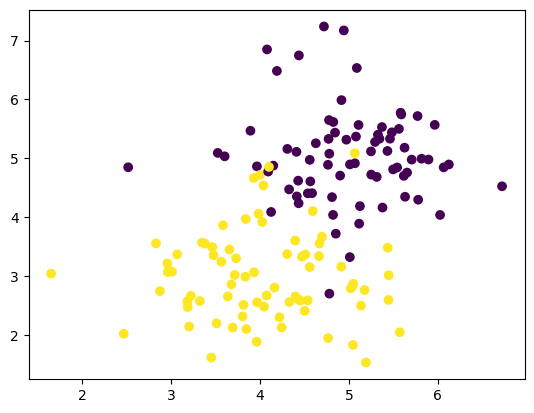

In [29]:
# Generate data

# Configuration options
num_samples_total = 150
cluster_centers = [(5,5), (4,3)]
num_classes = len(cluster_centers)

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, cluster_std = 0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)


In [30]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear', C=1, degree=1)

# Fit the data to the SVM classifier
svm = svm.fit(X, y)


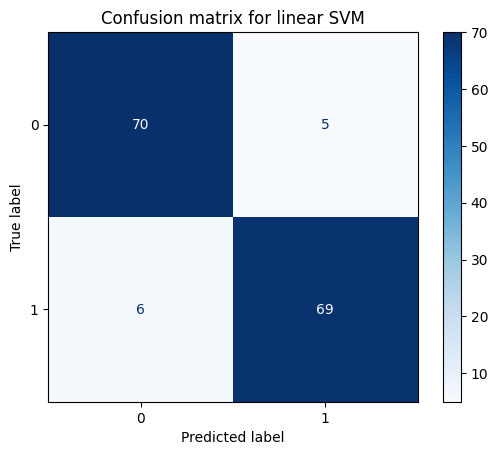

In [31]:
# Evaluate by means of a confusion matrix
matrix = ConfusionMatrixDisplay.from_estimator(svm, X, y,
                                               cmap=plt.cm.Blues)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [32]:
# Generate predictions
y_pred = svm.predict(X)

# Evaluate by means of accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Model accuracy: {accuracy:.4f}')

Model accuracy: 0.9267


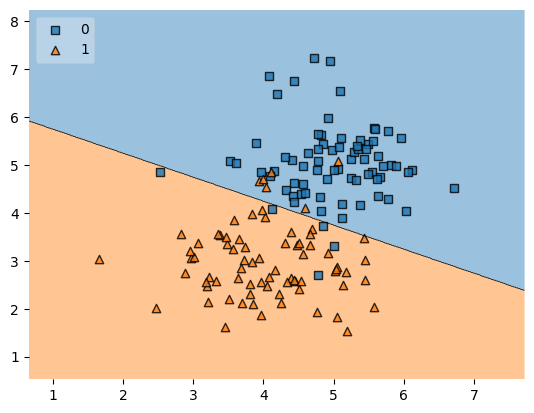

In [33]:
# Plot decision boundary
plot_decision_regions(X, y, clf=svm, legend=2)
plt.show()

# 모델을 평가하려면, 데이터를 어떻게 나누지?

In [34]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

no of training data:  120
no of testing data:  30


In [35]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Evaluate by means of accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Model training accuracy: {train_accuracy:.4f}')
print(f'Model testing accuracy: {test_accuracy:.4f}')

Model training accuracy: 0.9083
Model testing accuracy: 0.9667


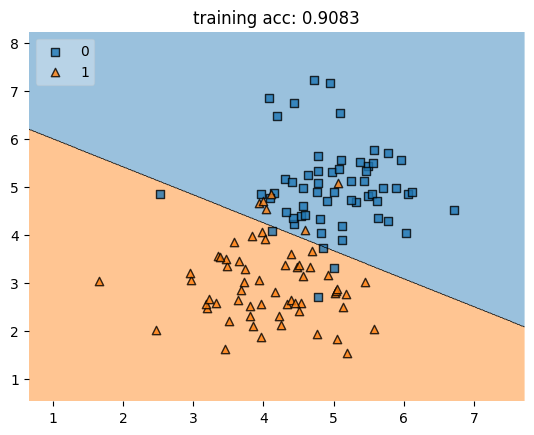

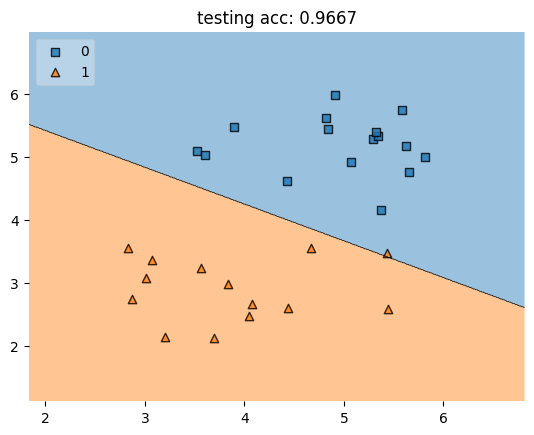

In [36]:
# Plot decision boundary for training data
plot_decision_regions(X_train, y_train, clf=svm, legend=2)
plt.title(f'training acc: {train_accuracy:.4f}')
plt.show()

# Plot decision boundary for testing data
plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.title(f'testing acc: {test_accuracy:.4f}')
plt.show()

# 모델이 정말로 견고한지(Robust) 확인해보자!!!
## 교차 검증(Cross Validation).

교차 검증은 데이터를 k-폴드(k-fold)로 나누는 것입니다. 여기서는 5-폴드(5-fold)를 예시로 듭니다. <br>

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV.png" width="512"/>

<br>

**첫 번째 반복(Iteration)**,
* 처음 4개 세트의 데이터를 학습용(파란 상자)으로 사용하고, 마지막 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_1 (validation accuracy_1)*을 얻게 됩니다. <br>

**두 번째 반복**,
* 1, 2, 3, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 4번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_2 (validation accuracy_2)*를 얻게 됩니다. <br>

**세 번째 반복**,
* 1, 2, 4, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 3번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키고, 검증 데이터에 대해 테스트합니다.
* *검증 정확도_3 (validation accuracy_3)*을 얻게 됩니다. <br>

**5번째 반복까지 진행하면, 총 5개의 검증 정확도를 얻게 됩니다. <br>
평균 정확도를 계산하여 모델의 성능을 평가할 수 있습니다.**

In [37]:
from sklearn.model_selection import KFold
# refer to https://scikit-learn.org/stable/modules/cross_validation.html

kf = KFold(n_splits=5)
n=1
train_acc, val_acc = [], []

for train_index, test_index in kf.split(X):
  X_train, X_val = X[train_index], X[test_index]
  y_train, y_val = y[train_index], y[test_index]

  print('Fold ', n)
  print('no of training data: ', len(X_train))
  print('no of validation data: ', len(X_val))

  # Create the SVM with linear kernel
  svm = SVC(random_state=42, kernel='linear')

  # Fit the data to the SVM classifier
  svm = svm.fit(X_train, y_train)

  # Generate predictions
  y_pred_train = svm.predict(X_train)
  y_pred_val = svm.predict(X_val)

  # Evaluate by means of accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  val_accuracy = accuracy_score(y_val, y_pred_val)
  print(f'Model training accuracy: {train_accuracy:.4f}')
  print(f'Model testing accuracy: {val_accuracy:.4f}')

  n += 1
  train_acc.append(train_accuracy)
  val_acc.append(val_accuracy)
  print('------------------------------------')

print(f'Validation Accuracy: {np.average(val_acc):.4f} +- {np.std(val_acc):.4f}')

Fold  1
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9333
Model testing accuracy: 0.9000
------------------------------------
Fold  2
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9333
Model testing accuracy: 0.9000
------------------------------------
Fold  3
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9083
Model testing accuracy: 1.0000
------------------------------------
Fold  4
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9250
Model testing accuracy: 0.9333
------------------------------------
Fold  5
no of training data:  120
no of validation data:  30
Model training accuracy: 0.9250
Model testing accuracy: 0.9000
------------------------------------
Validation Accuracy: 0.9267 +- 0.0389


# 하이퍼파라미터 튜닝 (Hyperparameter Tuning)

우리는 튜닝 가능한 파라미터들이 있다는 것을 알고 있습니다. 예를 들어, 커널(선형 / 다항식 / rbf)이나 C(규제항)를 선택하는 것 등입니다. 최적의 하이퍼파라미터를 결정하기 위해, 우리는 교차 검증(Cross Validation) 개념을 사용하여 최적의 값을 찾는 grid_search를 사용합니다.


<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV_test.png" width="512"/>

<br>

**데이터를 학습(Train), 검증(Validation), 테스트(Test) 세트로 분할**

**첫 번째 반복(Iteration)**,
* 처음 4개 세트의 데이터를 학습용(파란 상자)으로 사용하고, 마지막 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키되, ***다양한 하이퍼파라미터 조합을 사용하여*** 학습하고 검증 데이터에 대해 테스트합니다.
* 예를 들어 5가지 하이퍼파라미터 조합을 시도했다면, 5개의 모델과 5개의 검증 정확도를 얻게 됩니다.
* 가장 높은 검증 정확도를 보이는 모델이 선택됩니다.
* *검증 정확도_1 (validation accuracy_1)*과 *하이퍼파라미터 세트_1 (hyperparameter_1)*을 얻게 됩니다. <br>

**두 번째 반복**,
* 1, 2, 3, 5번째 세트의 데이터를 학습용(파란 상자)으로 사용하고, 4번째 세트의 데이터를 검증용(흰 상자)으로 사용합니다.
* 학습 데이터를 사용하여 모델을 학습시키되, ***다양한 하이퍼파라미터 조합을 사용하여*** 학습하고 검증 데이터에 대해 테스트합니다.
* 예를 들어 5가지 하이퍼파라미터 조합을 시도했다면, 5개의 모델과 5개의 검증 정확도를 얻게 됩니다.
* *검증 정확도_2 (validation accuracy_2)*와 *하이퍼파라미터 세트_2 (hyperparameter_2)*를 얻게 됩니다. <br>


**5번째 반복까지 진행하면, 총 5개의 검증 정확도를 얻게 됩니다. <br>
가장 높은 검증 정확도를 제공하는 하이퍼파라미터 세트가 선택됩니다. <br>
선택된 최적의 하이퍼파라미터를 사용하여 모든 학습 + 검증 데이터를 합친 데이터로 모델을 재학습(Retrain)시킵니다. <br>
테스트 세트에서 최종 모델을 평가합니다**

### 앞서 설명한 절차를 수행하는 GridSearchCV를 사용할 수 있습니다.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/iris.PNG" width="620"/>

이 예제에서는 iris(붓꽃) 데이터를 사용합니다.
X는 4개의 변수를 가집니다.
1. 꽃받침 길이 (sepal length in cm)
2. 꽃받침 너비 (sepal width in cm)
3. 꽃잎 길이 (petal length in cm)
4. 꽃잎 너비 (petal width in cm)

y는 3개의 출력을 가집니다.
* 0 -- Iris Setosa
* 1 -- Iris Versicolour
* 2 -- Iris Virginica

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

# use iris data
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))


no of training data:  120
no of testing data:  30


In [39]:
svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)
results = clf.cv_results_
results = pd.DataFrame.from_dict(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000523,0.000128,0.000297,0.000011,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",1.000000,0.933333,0.933333,0.966667,0.958333,0.027639,2
1,0.000665,0.000251,0.000347,0.000046,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.966667,0.766667,0.933333,0.900000,0.891667,0.075920,6
2,0.000404,0.000063,0.000237,0.000024,1.0,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,0.966667,0.933333,0.966667,0.966667,0.023570,1
3,0.000410,0.000072,0.000276,0.000019,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",1.000000,0.933333,0.933333,0.966667,0.958333,0.027639,2
4,0.000380,0.000057,0.000293,0.000130,10.0,linear,"{'C': 10, 'kernel': 'linear'}",0.966667,0.933333,0.933333,1.000000,0.958333,0.027639,5
5,0.000328,0.000013,0.000343,0.000194,10.0,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,0.966667,0.933333,0.966667,0.958333,0.014434,2


In [40]:
# Retrain the model with the best hyperparameter
best_param = clf.best_params_
print('best param: ', best_param)
svc.set_params(**best_param)
svc.fit(X_train, y_train)

best param:  {'C': 1, 'kernel': 'linear'}


,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [41]:
# Evaluate model performance using test data

# Generate predictions
y_pred = svc.predict(X_test)

# Evaluate by means of accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print('Model CV accuracy: ', results['mean_test_score'].iloc[2])
print('Model testing accuracy: ', test_accuracy)
print('Parameter used:', best_param)

Model CV accuracy:  0.9666666666666668
Model testing accuracy:  1.0
Parameter used: {'C': 1, 'kernel': 'linear'}


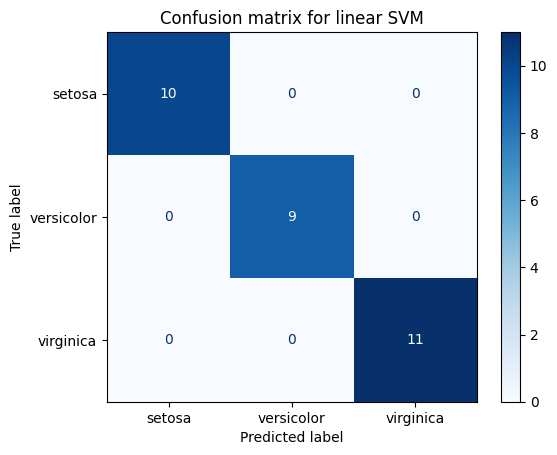

In [42]:
# Evaluate by means of a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate by means of a confusion matrix
matrix = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test,
                              cmap=plt.cm.Blues,
                               display_labels=iris.target_names)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [43]:
from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 최종과제: 유방암 데이터를 가장 잘 분류하는 SVM 모델 학습

## 데이터 Load & SVM 모델 학습

#### Model을 Fitting 하는 과정 진행
* 입력 데이터 X 와 출력 레이블 y를 받아서 모델을 학습시키는 과정
* 두 클래스를 가장 잘 분류하는 Decision Boundary를 찾는 과정
* fit 메소드를 통해 모델에 Fitting == 클래스를 분류하는 선을 긋는 것

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [45]:
bc = datasets.load_breast_cancer() # 데이터 받아오기
X = bc.data
y = bc.target

In [46]:
svm = SVC(random_state=42, kernel='linear', C=1, degree=1) # SVM 객체 생성
svm = svm.fit(X, y) # Fitting

## Fitting 된 Model 결과 확인
* Confusion Matrix 를 사용해 결과 확인
* predict 메소드를 사용해 결과 확인

### Confusion Matrix를 사용해 학습된 모델의 성능을 평가

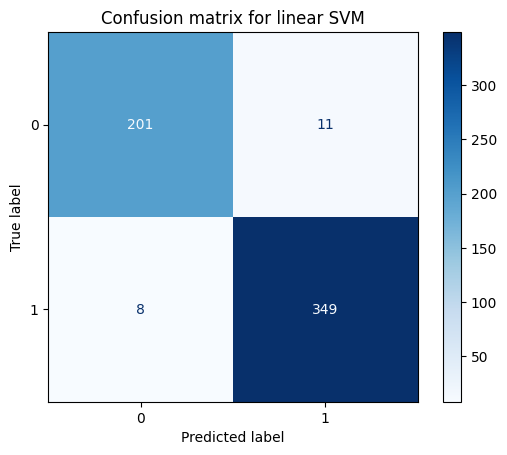

In [47]:
matrix = ConfusionMatrixDisplay.from_estimator(
    svm, 
    X, 
    y,
    cmap=plt.cm.Blues
) # Confusion Matrix 생성
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

#### 실행 결과 
* True Positive: 실제 양성인 데이터 중 양성으로 예측한 데이터, 201개
* True Negative: 실제 음성인 데이터 중 음성으로 예측한 데이터, 349개
* False Positive: 실제 음성인 데이터 중 양성으로 예측한 데이터, 11개
* False Negative: 실제 양성인 데이터 중 음성으로 예측한 데이터, 8개

#### 결과 분석
* (349 + 201) / (349 + 201 + 11 + 8) = 550/569
* 약 96.6%의 Accuracy를 갖고 있는 모델임을 확인할 수 있음

### predict 메소드를 사용해 학습된 모델의 성능을 평가

In [48]:
y_pred = svm.predict(X)

# Evaluate by means of accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Model accuracy: {accuracy:.4f}')

Model accuracy: 0.9666


#### 결과 분석
* predict 메소드는 통해 모델이 예측한 데이터 y_pred와 실제 데이터 y를 비교하여 정확도를 평가
* 실행 결과: Model accuracy: 0.9666

## 모델 평가
### 진행 과정
* 전체 데이터 중에서, 특정 비율로 학습 데이터와 테스트 데이터를 일정 비율로 분리
* 학습 데이터를 사용하여 모델을 학습시키고, 테스트 데이터에 대해 테스트를 진행
* 테스트 데이터의 비율을 0.1(10%)씩 증가시키면서, 모델의 정확도가 어떻게 변화하는지 확인

In [49]:
# 학습 데이터와 테스트 데이터를 받아서 모델을 학습시키고, 테스트 데이터에 대해 테스트를 진행
# 학습 데이터와 테스트 데이터에 대한 정확도를 출력하는 함수
def train_and_test(X_train, X_test, y_train, y_test):
    svm = SVC(random_state=42, kernel='linear')
    svm = svm.fit(X_train, y_train)

    y_pred_train = svm.predict(X_train)
    y_pred_test = svm.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f'Model training accuracy: {train_accuracy:.4f}')
    print(f'Model testing accuracy: {test_accuracy:.4f}')

In [50]:
for i in range(1, 5 + 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i * 0.1), random_state=42)
    print("----------------------------------")
    print(f'Testing Data Ratio: {i * 0.1}')
    print(f'Number of Testing Data: {len(X_test)} Training Data: {len(X_train)}')
    print()
    train_and_test(X_train, X_test, y_train, y_test)

----------------------------------
Testing Data Ratio: 0.1
Number of Testing Data: 57 Training Data: 512

Model training accuracy: 0.9629
Model testing accuracy: 0.9825
----------------------------------
Testing Data Ratio: 0.2
Number of Testing Data: 114 Training Data: 455

Model training accuracy: 0.9692
Model testing accuracy: 0.9561
----------------------------------
Testing Data Ratio: 0.30000000000000004
Number of Testing Data: 171 Training Data: 398

Model training accuracy: 0.9648
Model testing accuracy: 0.9649
----------------------------------
Testing Data Ratio: 0.4
Number of Testing Data: 228 Training Data: 341

Model training accuracy: 0.9648
Model testing accuracy: 0.9605
----------------------------------
Testing Data Ratio: 0.5
Number of Testing Data: 285 Training Data: 284

Model training accuracy: 0.9648
Model testing accuracy: 0.9649


### 실행 결과

| Test 비율 | Test 개수 | Train 개수 | Training Accuracy | Testing Accuracy |
|:---------:|:---------:|:----------:|:-----------------:|:----------------:|
| 0.1 (10%) | 57 | 512 | 0.9629 | 0.9825 |
| 0.2 (20%) | 114 | 455 | 0.9692 | 0.9561 |
| 0.3 (30%) | 171 | 398 | 0.9648 | 0.9649 |
| 0.4 (40%) | 228 | 341 | 0.9648 | 0.9605 |
| 0.5 (50%) | 285 | 284 | 0.9648 | 0.9649 |

### 결과 분석
* **10% Test**: Testing accuracy가 98.25%로 높지만, 샘플 수가 적어(57개) 편향적인 결과일 가능성이 있음
* **20% Test**: Training 455개로 충분히 학습하며(96.92%), Testing도 114개로 신뢰할 수 있는 평가 제공 (95.61%)
* **30-50% Test**: Training 수가 줄어들지만(398→284개) 성능은 비슷하게 유지됨

많은 머신러닝 프로젝트에서 80/20이 대표적으로 사용되므로, 아래 K-Fold 교차 검증에서도 80/20 비율로 진행할 예정.

### 모델의 견고함 확인: K-Fold 교차 검증
* 데이터를 5개의 Fold로 나누고, 각 Fold에 대해 학습과 검증을 진행
* 각 Fold의 검증 정확도를 더하고 평균을 내어 모델의 성능을 더욱 견고하게 확인

In [51]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
n=1
train_acc, val_acc = [], []

for train_index, test_index in kf.split(X):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    print('Fold ', n)
    print('no of training data: ', len(X_train))
    print('no of validation data: ', len(X_val))

    # Create the SVM with linear kernel
    svm = SVC(random_state=42, kernel='linear')

    # Fit the data to the SVM classifier
    svm = svm.fit(X_train, y_train)

    # Generate predictions
    y_pred_train = svm.predict(X_train)
    y_pred_val = svm.predict(X_val)

    # Evaluate by means of accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    print(f'Model training accuracy: {train_accuracy:.4f}')
    print(f'Model testing accuracy: {val_accuracy:.4f}')

    n += 1
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)
    print('------------------------------------')

print(f'Validation Accuracy: {np.average(val_acc):.4f} +- {np.std(val_acc):.4f}')

Fold  1
no of training data:  455
no of validation data:  114
Model training accuracy: 0.9758
Model testing accuracy: 0.9298
------------------------------------
Fold  2
no of training data:  455
no of validation data:  114
Model training accuracy: 0.9582
Model testing accuracy: 0.9561
------------------------------------
Fold  3
no of training data:  455
no of validation data:  114
Model training accuracy: 0.9670
Model testing accuracy: 0.9649
------------------------------------
Fold  4
no of training data:  455
no of validation data:  114
Model training accuracy: 0.9692
Model testing accuracy: 0.9649
------------------------------------
Fold  5
no of training data:  456
no of validation data:  113
Model training accuracy: 0.9649
Model testing accuracy: 0.9469
------------------------------------
Validation Accuracy: 0.9525 +- 0.0132


## K-Fold 교차 검증 실행 결과

| Iteration | Training 개수 | Validation 개수 | Training Accuracy | Validation Accuracy |
|:----:|:-------------:|:---------------:|:-----------------:|:-------------------:|
| 1 | 455 | 114 | 0.9758 | 0.9298 |
| 2 | 455 | 114 | 0.9582 | 0.9561 |
| 3 | 455 | 114 | 0.9670 | 0.9649 |
| 4 | 455 | 114 | 0.9692 | 0.9649 |
| 5 | 456 | 113 | 0.9649 | 0.9469 |

### 평균 정확도
- **평균 Training Accuracy**: 0.9670 (96.70%)
- **평균 Validation Accuracy**: 0.9525 ± 0.0132

### 결과 분석
* Iteration 1, 5 에서는 Validation Accuracy가 0.9298, 0.9469 으로 상대적으로 더 어려운 Validation 데이터
* 나머지 Iteration 은 상대적으로 쉬운 Validation 데이터였음을 알 수 있음 
* Validation 데이터의 난이도 차이가 존재할 수 있고 이게 평가에도 영향을 미친다는 사실을 확인
* 이를 보완하기 위해 5개의 Fold로 나누고 각각을 평균내어 확인함으로서 검증 데이터의 편향을 줄임
* K-Fold 교차 검증이 더욱 안정적이고 견고한 평가 지표라는 사실을 확인하며, 실제로 Model을 견고하게 평가함

## 하이퍼파라미터 튜닝
* 교차 검증 개념을 사용하여 최적의 값을 찾는 Grid Search를 사용
* 커널이나 오류 허용에 대한 하이퍼 파라미터 규제항 C 에 대한 최적의 값을 선택해 모델의 성능을 최대화하는 것

In [52]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)
results = clf.cv_results_
results = pd.DataFrame.from_dict(results)
results

no of training data:  455
no of testing data:  114


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.087149,0.088202,0.000485,0.000080,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.947368,0.938596,0.964912,0.920354,0.942808,0.016057,3
1,0.001326,0.000106,0.001007,0.000093,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.868421,0.885965,0.894737,0.831858,0.870245,0.024103,6
2,0.756334,0.322795,0.000531,0.000068,1.0,linear,"{'C': 1, 'kernel': 'linear'}",0.956140,0.947368,0.973684,0.920354,0.949387,0.019255,1
3,0.001081,0.000112,0.000784,0.000085,1.0,rbf,"{'C': 1, 'kernel': 'rbf'}",0.929825,0.903509,0.938596,0.849558,0.905372,0.034715,5
4,1.899072,0.911937,0.000493,0.000036,10.0,linear,"{'C': 10, 'kernel': 'linear'}",0.947368,0.964912,0.964912,0.920354,0.949387,0.018228,1
5,0.000917,0.000067,0.000602,0.000020,10.0,rbf,"{'C': 10, 'kernel': 'rbf'}",0.973684,0.885965,0.912281,0.893805,0.916434,0.034407,4


### 실행 결과
* 전반적으로 RBF 커널을 사용하는 것보다 Linear 커널을 사용하는 것이 더 좋은 성능을 가짐을 확인
* 오류 허용에 대한 하이퍼 파라미터 C에 대해서는 너무 작은 값 (0.1) 보다는 
* 상대적으로 큰 값(1, 10)이 더 좋은 성능을 가짐을 확인

### 결과 분석
* RBF 커널을 사용하는 것보다 Linear 커널을 사용하는 것이 더 좋은 성능을 보이는 것을 통해, 학습한 유방암 데이터들이 선형적으로 잘 분리가 됨을 나타냄
* 오류 허용에 대한 파라미터 C에 대해서는 오류를 허용하는 것보다, 오류를 덜 허용하도록 만드는 것이 더 좋은 성능을 보이는 것을 통해 경계를 넘어가는 데이터 포인트들이 많지 않음을 나타냄

### 가장 좋은 하이퍼파라미터를 선택
* GridSearchCV의 best_params_ 속성을 확인

In [53]:
best_param = clf.best_params_
print('best param: ', best_param)
svc.set_params(**best_param)
svc.fit(X_train, y_train)

best param:  {'C': 1, 'kernel': 'linear'}


,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### 실행 결과
* GridSearchCV의 best_params_ 속성을 확인
* { kernel: 'linear', C: 1 } 이 가장 좋은 하이퍼파라미터

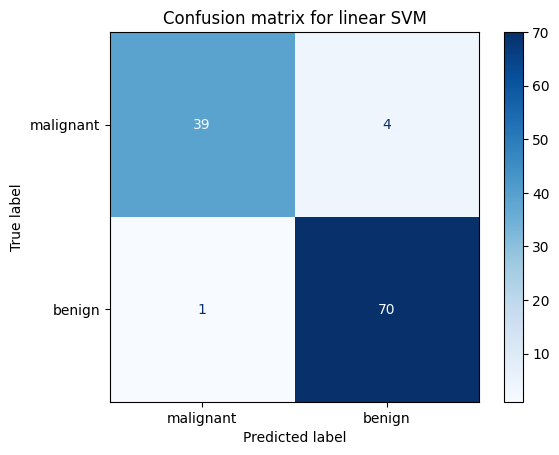

In [54]:
# Evaluate by means of a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate by means of a confusion matrix
matrix = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test,
                              cmap=plt.cm.Blues,
                               display_labels=bc.target_names)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

### 실행 결과 - Test 데이터에 대한 Confusion Matrix를 확인
* True Positivie: 실제 양성인 데이터 중 양성으로 예측한 데이터, 39개
* True Negative: 실제 음성인 데이터 중 음성으로 예측한 데이터, 70개
* False Positive: 실제 음성인 데이터 중 양성으로 예측한 데이터, 1개
* False Negative: 실제 양성인 데이터 중 음성으로 예측한 데이터, 4개

#### 결과 분석
* (39 + 70) / (39 + 1 + 70 + 4) = 약 95.6%
* 약 95.6%의 Accuracy를 갖고 있는 모델임을 확인할 수 있음

## 전체 실습 내용 정리

이번 실습에서는 유방암 데이터셋에 대한 SVM 분류 모델을 학습하고, 체계적인 평가 및 최적화를 수행했습니다.

#### 1. 초기 모델 학습 및 평가
- 모델 설정: Linear kernel, C=1 (임의의 값)
- 전체 데이터에 대한 정확도: 96.66%
- Confusion Matrix: 
  - 전체 569개 데이터 중 550개를 정확히 분류
  - True Positive: 201개, True Negative: 349개
  - False Positive: 11개, False Negative: 8개

#### 2. Train/Test 데이터를 나누는 기준 실습
다양한 데이터 분할 비율(10%, 20%, 30%, 40%, 50%)로 실험한 결과:
- 최적 비율: 80/20 (Training: 455개, Testing: 114개)
- 성능: Training Accuracy 96.92%, Testing Accuracy 95.61%
- 결론: 충분한 학습 데이터와 신뢰할 수 있는 테스트 데이터의 양을 어떻게 결정할 수 있는지에 대한 과정을 실습했습니다.

#### 3. K-Fold 교차 검증
5-Fold 교차 검증을 통해 모델의 견고함을 확인:
- 평균 Training Accuracy: 96.70%
- 평균 Validation Accuracy: 95.25% ± 1.32%
- 결론: Train/Test 데이터를 나눴을 때, Test 데이터에 편향성이 있을 수 있음을 확인했고, 이를 Test 데이터셋을 다르게 나누어 평균내는 검증 방범을 사용함으로써 표준편차가 작아 안정적이고 일관되게 평가할 수 있다는 것을 확인했습니다.

#### 4. 하이퍼파라미터 튜닝
GridSearchCV를 사용하여 최적의 하이퍼파라미터를 탐색:
- 최적 하이퍼파라미터는 C=1, kernel='linear' 임을 확인할 수 있었습니다.
- 평균 CV Accuracy: 94.94%
- 주요 발견사항:
  - Linear kernel이 RBF kernel보다 우수 (유방암 데이터는 선형 분리 가능)
  - C=1 또는 C=10일 때 최고 성능 (하드마진에 가까운 설정이 효과적)
  - C=0.1일 때는 과도한 오분류 허용으로 성능 저하

#### 5. 최종 모델
- 모델 SVM with Linear Kernel
- 하이퍼파라미터 C=1, kernel='linear'
- Testing Accuracy: 95.61%

결론적으로, 이번 실습을 통해 체계적인 모델 평가(Train/Test 데이터셋 비율, K-Fold 검증)와 하이퍼파라미터 튜닝의 전반적인 과정을 수행하면서 SVM 모델을 최적화 하는 과정의 중요성을 이해했습니다. 그리고 이를 통해, 유방암 데이터에 대해 약 95.6%의 정확도를 가진 안정적인 분류 모델을 개발하는 과정 전체를 확인할 수 있었습니다.